# Scipy

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.

In [1]:
from scipy import *

If we only need to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name `la`, we can do:

In [2]:
import scipy.linalg as la
import scipy.stats as st

from scipy.stats import genextreme

## Fourier transform

Fourier transforms are one of the universal tools in computational physics, which appear over and over again in different contexts. SciPy provides functions for accessing the classic [FFTPACK](http://www.netlib.org/fftpack/) library from NetLib, which is an efficient and well tested FFT library written in FORTRAN. The SciPy API has a few additional convenience functions, but overall the API is closely related to the original FORTRAN library.

To use the `fftpack` module in a python program, include it using:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import *

To demonstrate how to do a fast Fourier transform with SciPy, let's look at the FFT of the solution to the damped oscillator from the previous section:

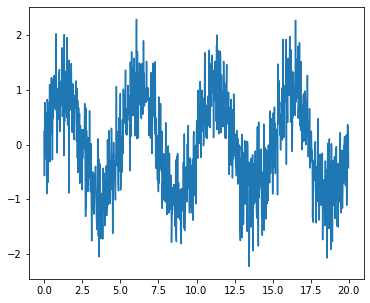

In [4]:
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

[]

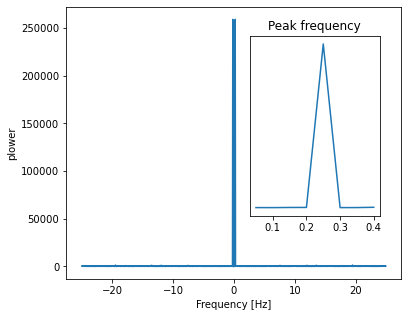

In [6]:
# The FFT of the signal
sig_fft = fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


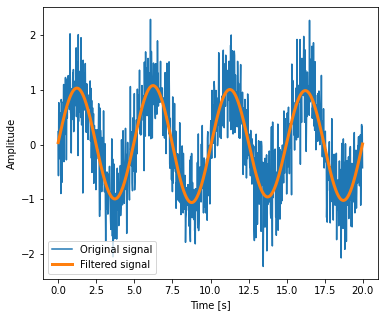

In [7]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [11]:
from scipy.linalg import *

In [10]:
import numpy as np
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

In [12]:
x = solve(A, b)

x

/var/folders/yr/jscdd90s2rdcvd490226gpqc0000gn/T/ipykernel_78012/4220959802.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=1.54198e-18): result may not be accurate.
  x = solve(A, b)


array([-0.33333333,  0.66666667,  0.        ])

In [13]:
# check
np.dot(A, x) - b

array([ 0.00000000e+00, -2.22044605e-16,  0.00000000e+00])

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:

In [14]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [15]:
X = solve(A, B)

In [16]:
X

array([[  3.17924463,  -2.76134169,   4.39589768],
       [ -7.06756055,  13.24319858, -10.8712428 ],
       [  9.85957628, -16.03430922,  13.1813431 ]])

### Eigenvalues and eigenvectors

The eigenvalue problem for a matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` and for calculating both eigenvalues and eigenvectors, use the function `eig`:

In [17]:
evals = eigvals(A)

In [18]:
evals

array([1.05186518+0.j      , 0.00380909+0.071763j, 0.00380909-0.071763j])

In [19]:
evals, evecs = eig(A)

In [20]:
evals

array([1.05186518+0.j      , 0.00380909+0.071763j, 0.00380909-0.071763j])

In [21]:
evecs

array([[ 0.52192907+0.j        ,  0.09157938-0.13251252j,
         0.09157938+0.13251252j],
       [ 0.35602427+0.j        , -0.56614386+0.14680001j,
        -0.56614386-0.14680001j],
       [ 0.77513661+0.j        ,  0.79497455+0.j        ,
         0.79497455-0.j        ]])

The eigenvectors corresponding to the $n$th eigenvalue (stored in `evals[n]`) is the $n$th *column* in `evecs`, i.e., `evecs[:,n]`. To verify this, let's try mutiplying eigenvectors with the matrix and compare to the product of the eigenvector and the eigenvalue:

In [22]:
n = 1

norm(np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

7.563286182938309e-16

There are also more specialized eigensolvers, like the `eigh` for Hermitian matrices. 

### Matrix operations

In [23]:
# the matrix inverse
#import scipy

#scipy.linalg.inv(A)

array([[  8.54565946,  -1.62043904,  -4.36970533],
       [-40.38520869,  17.87221773,  19.42075808],
       [ 54.69536606, -25.87761616, -23.9920622 ]])

In [24]:
# determinant
det(A)

0.005432291908918982

In [25]:
# norms of various orders
norm(A, ord=2), norm(A, ord=np.Inf)

(1.191962588055346, 1.5609383601980296)

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [30]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [27]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

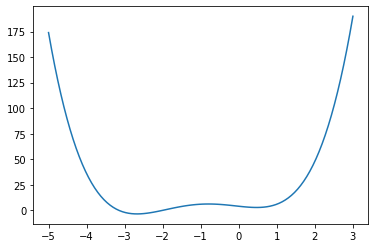

In [28]:
import matplotlib.pyplot as plt
fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

We can use the `fmin_bfgs` function to find the minima of a function:

In [31]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [32]:
optimize.brent(f)

0.46961743402759754

In [33]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Finding a solution to a function

To find the root for a function of the form $f(x) = 0$ we can use the `fsolve` function. It requires an initial guess: 

In [35]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return np.tan(2*np.pi*omega) - omega_c/omega

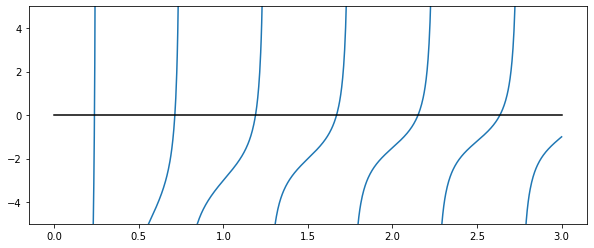

In [36]:
fig, ax  = plt.subplots(figsize=(10,4))
x = np.linspace(0.1, 3, 1000)
y = f(x)
mask = np.where(abs(y) > 50)
x[mask] = y[mask] = np.NaN # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [37]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [38]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [32]:
optimize.fsolve(f, 1.1)

array([1.18990285])

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [40]:
from scipy.interpolate import *

In [41]:
def f(x):
    return np.sin(x)

In [44]:
n = np.arange(0.1, 10)  
x = np.linspace(0.1, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

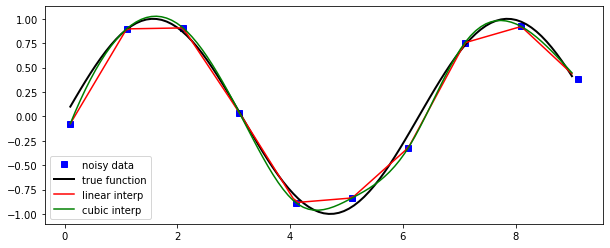

In [45]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

There is also a very powerful python package for statistical modelling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [47]:
from scipy import stats
from scipy.stats import poisson

In [51]:
# create a (discreet) random variable with poissionian distribution

X = poisson(3.5) # photon distribution for a coherent state with n=3.5 photons
Y = stats.norm()

In [53]:
X

In [55]:
n = stats.norm(3, 4).rvs(100)
n

array([ 1.36036439,  4.7367937 ,  5.38948367, -3.44560667,  1.37700038,
        4.54034545, -5.07860859, -0.6491875 , -2.27686183,  3.20228301,
       13.10211685,  5.31229049, -1.50643261,  2.29989188,  2.64205565,
        5.00786127,  4.43114784, -0.50670864, -3.0802488 ,  5.17924356,
        6.57023545,  0.51402752,  2.68496296,  2.3696763 ,  3.75949049,
        6.27640776,  0.30538034,  7.72727394, -3.04487524, -2.7513923 ,
        9.82965501,  0.55609205,  0.23348613,  0.80349297,  5.82640376,
       -0.57137865,  7.83654323,  5.15914191,  1.10203858,  4.52745938,
        2.15598661,  1.56865187,  6.84042329, 10.71950166,  2.53086773,
       -1.17570856, 12.21945901,  5.96056303,  1.87531679,  7.38951028,
        6.50035285, -0.27795982,  5.51919311,  5.55239433,  2.48948493,
        5.2907641 ,  4.36482223, 11.42313491, -4.08348783, -3.27086694,
        7.16279581,  1.44172718, 12.91472286, -0.40698164,  3.70036544,
       -1.96455187,  5.45743027, 15.5025406 ,  5.6174796 , 11.38

(array([ 8.,  7., 16., 20., 14., 19.,  6.,  3.,  5.,  2.]),
 array([-5.07860859, -3.02049367, -0.96237875,  1.09573617,  3.15385109,
         5.211966  ,  7.27008092,  9.32819584, 11.38631076, 13.44442568,
        15.5025406 ]),
 <BarContainer object of 10 artists>)

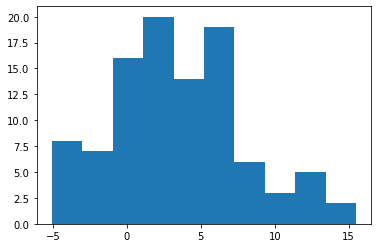

In [57]:
plt.hist(n)

In [58]:
params = stats.norm.fit(n)

xteo = np.linspace(n.min(), n.max(), 600)
stats.norm.cdf(xteo, params[0], params[1])

array([0.02699372, 0.02747885, 0.02797123, 0.02847094, 0.02897805,
       0.02949265, 0.0300148 , 0.03054461, 0.03108213, 0.03162746,
       0.03218067, 0.03274184, 0.03331106, 0.0338884 , 0.03447395,
       0.03506778, 0.03566999, 0.03628064, 0.03689983, 0.03752762,
       0.03816411, 0.03880938, 0.03946351, 0.04012658, 0.04079867,
       0.04147987, 0.04217025, 0.0428699 , 0.04357891, 0.04429734,
       0.0450253 , 0.04576285, 0.04651008, 0.04726707, 0.0480339 ,
       0.04881066, 0.04959742, 0.05039428, 0.0512013 , 0.05201857,
       0.05284616, 0.05368418, 0.05453268, 0.05539175, 0.05626147,
       0.05714193, 0.05803319, 0.05893534, 0.05984846, 0.06077262,
       0.06170791, 0.0626544 , 0.06361216, 0.06458128, 0.06556182,
       0.06655387, 0.06755751, 0.06857279, 0.06959981, 0.07063862,
       0.07168932, 0.07275196, 0.07382662, 0.07491337, 0.07601228,
       0.07712342, 0.07824686, 0.07938267, 0.08053091, 0.08169165,
       0.08286497, 0.08405092, 0.08524956, 0.08646097, 0.08768

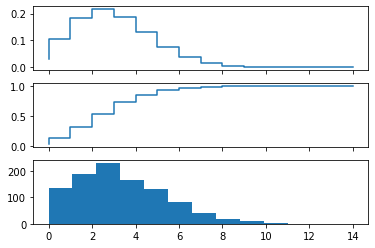

In [60]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [40]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

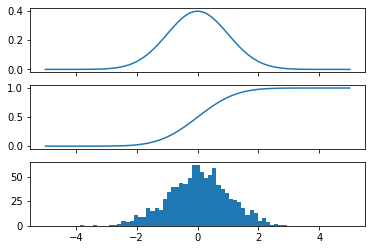

In [61]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Statistics:

In [42]:
X.mean(), X.std(), X.var() # poission distribution

(3.5, 1.8708286933869707, 3.5)

In [43]:
Y.mean(), Y.std(), Y.var() # normal distribution

(0.0, 1.0, 1.0)

### Statistical tests

Test if two sets of (independent) random data comes from the same distribution:

In [44]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print("t-statistic =", t_statistic)
print("p-value =", p_value)

t-statistic = 0.415163298031662
p-value = 0.6780669410199414


Since the p value is very large we cannot reject the hypothesis that the two sets of random data have *different* means.

To test if the mean of a single sample of data has mean 0.1 (the true mean is 0.0):

In [45]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-4.145125585708649, pvalue=3.684298287097832e-05)

Low p-value means that we can reject the hypothesis that the mean of Y is 0.1.

In [48]:
Y.mean()

0.0

In [49]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

Ttest_1sampResult(statistic=1.1059215838554113, pvalue=0.2690267126105416)

## Signal

The `scipy.signal` module contains a large number of signal analysis functions. For a complete documentation of its features, see https://docs.scipy.org/doc/scipy/reference/signal.html.

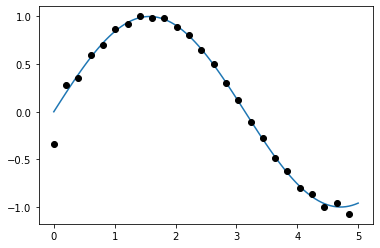

In [46]:
# scipy.signal.resample(): resample a signal to n points using FFT.
t = np.linspace(0, 5, 100)
x = np.sin(t)

from scipy import signal
x_resampled = signal.resample(x, 25)

plt.plot(t, x) 

plt.plot(t[::4], x_resampled, 'ko')

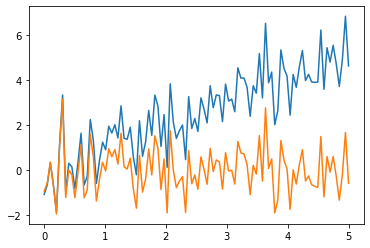

In [62]:
# scipy.signal.detrend(): remove linear trend from signal:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

from scipy import signal
x_detrended = signal.detrend(x)

plt.plot(t, x) 

plt.plot(t, x_detrended) 

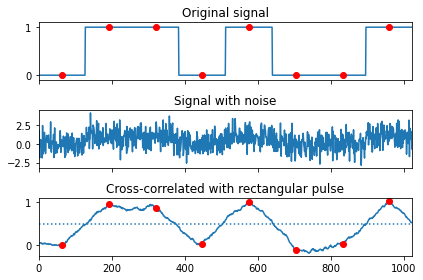

In [63]:
# Cross correlated signal
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()